In [50]:
import pandas as pd
import numpy as np

In [51]:
data = pd.read_csv("light-bulb-raw-export.csv")
data.head()

,timestamp,current,lampIsRunning,voltage
0,2019-11-05 09:19:17,0.000000,False,0.000000
1,2019-11-05 09:19:17,0.000000,False,0.000000
2,2019-11-05 09:19:17,138.933486,False,34.535565
3,2019-11-05 09:19:17,138.933486,True,34.535565
4,2019-11-05 09:19:17,139.860172,True,33.039042


In [52]:
# check if there is any null
data.isnull().values.any()
data.dropna(inplace=True)

In [53]:
# reverse data table
data = data.iloc[::-1]

In [54]:
data.describe()

,current,voltage
count,10676.000000,10676.000000
mean,137.656154,11.695346
std,21.068849,7.244864
min,0.000000,0.000000
25%,120.795369,6.180031
50%,139.525598,11.110937
75%,156.446747,16.550302
max,177.829100,76.108256


In [55]:
print(data["voltage"].max())
print(data["current"].max())

# normalize data
data["voltage"] = data["voltage"] / data["voltage"].max()
data["current"] = data["current"] / data["current"].max()

76.10825644869111
177.8291001434133


In [56]:
data.describe()

,current,voltage
count,10676.000000,10676.000000
mean,0.774092,0.153667
std,0.118478,0.095192
min,0.000000,0.000000
25%,0.679278,0.081201
50%,0.784605,0.145989
75%,0.879759,0.217457
max,1.000000,1.000000


In [57]:
# delete timestamp column
data.drop(columns="timestamp", inplace=True)
data

,current,lampIsRunning,voltage
10675,0.670266,False,0.834433
10674,0.000000,False,0.000000
10673,0.674805,True,0.210227
10672,0.675624,True,0.201216
10671,0.674761,True,0.194146
...,...,...,...
4,0.786486,True,0.434106
3,0.781275,True,0.453769
2,0.781275,False,0.453769
1,0.000000,False,0.000000


## Classification of time to failure

In [58]:
data['failure'] = (data['lampIsRunning'] == False).astype(int)
data

,current,lampIsRunning,voltage,failure
10675,0.670266,False,0.834433,1
10674,0.000000,False,0.000000,1
10673,0.674805,True,0.210227,0
10672,0.675624,True,0.201216,0
10671,0.674761,True,0.194146,0
...,...,...,...,...
4,0.786486,True,0.434106,0
3,0.781275,True,0.453769,0
2,0.781275,False,0.453769,1
1,0.000000,False,0.000000,1


In [59]:
s = data['failure'].iloc[::-1].cumsum()
data['ttf'] = s.groupby(s).cumcount()
data.describe()

,current,voltage,failure,ttf
count,10676.000000,10676.000000,10676.000000,10676.000000
mean,0.774092,0.153667,0.001686,4672.209442
std,0.118478,0.095192,0.041029,3033.832973
min,0.000000,0.000000,0.000000,0.000000
25%,0.679278,0.081201,0.000000,1972.750000
50%,0.784605,0.145989,0.000000,4641.500000
75%,0.879759,0.217457,0.000000,7310.250000
max,1.000000,1.000000,1.000000,9979.000000


In [60]:
data = data[data['ttf'] < 120]
data.describe()

,current,voltage,failure,ttf
count,540.000000,540.000000,540.000000,540.000000
mean,0.601270,0.308219,0.033333,48.612963
std,0.178495,0.136120,0.179672,34.037852
min,0.000000,0.000000,0.000000,0.000000
25%,0.547877,0.237589,0.000000,20.000000
50%,0.631695,0.272342,0.000000,43.000000
75%,0.693756,0.326006,0.000000,74.250000
max,0.793102,1.000000,1.000000,119.000000


In [61]:
data.drop(columns="failure", inplace=True)
data.drop(columns="lampIsRunning", inplace=True)
data.head()

c:\users\gralakj\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,current,voltage,ttf
10675,0.670266,0.834433,0
10674,0.000000,0.000000,0
10673,0.674805,0.210227,40
10672,0.675624,0.201216,39
10671,0.674761,0.194146,38


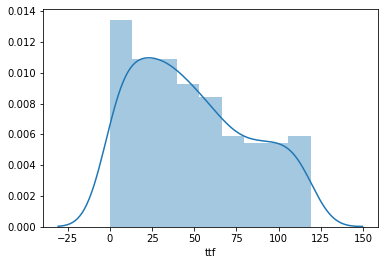

In [62]:
import seaborn as sbs
import matplotlib.pyplot as plt

sbs.distplot(data['ttf'])

In [63]:
data['ttf_label'] = np.where(data['ttf'] > 90, '>90s',
                    np.where(data['ttf'] > 60, '>60s',
                    np.where(data['ttf'] > 30, '30-60s',
                    np.where(data['ttf'] > 10, '10-30s', '<10s'))))

c:\users\gralakj\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


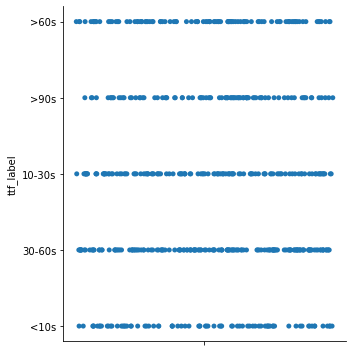

In [64]:
data.tail()
sbs.catplot(y="ttf_label", data=data)

In [65]:
data.tail()

,current,voltage,ttf,ttf_label
4,0.786486,0.434106,2,<10s
3,0.781275,0.453769,1,<10s
2,0.781275,0.453769,0,<10s
1,0.000000,0.000000,0,<10s
0,0.000000,0.000000,0,<10s


In [66]:
from collections import deque
import random

LOOKBACK_SIZE = 20

seq_data = []
prev_data = deque(maxlen=LOOKBACK_SIZE)

for row in data.values:
    prev_data.append([columns for columns in row[:-2]])
    if len(prev_data) == LOOKBACK_SIZE:
        seq_data.append([np.array(prev_data), row[-1]])


random.shuffle(seq_data)
       
seq_data[0]

[array([[0.12, 0.22],
        [0.12, 0.22],
        [0.  , 0.22],
        [0.  , 0.  ],
        [0.  , 0.22],
        [0.  , 0.  ],
        [0.73, 0.24],
        [0.73, 0.26],
        [0.74, 0.26],
        [0.74, 0.27],
        [0.74, 0.27],
        [0.74, 0.27],
        [0.74, 0.26],
        [0.74, 0.27],
        [0.74, 0.27],
        [0.74, 0.26],
        [0.74, 0.27],
        [0.75, 0.27],
        [0.75, 0.27],
        [0.75, 0.28]]), '>90s']

In [67]:
X = []
y = []

y_dict= { 
    "<10s": [1.0, 0.0, 0.0, 0.0, 0.0],
    "10-30s":[0.0, 1.0, 0.0, 0.0, 0.0],
    "30-60s":[0.0, 0.0, 1.0, 0.0, 0.0],
    ">60s":[0.0, 0.0, 0.0, 1.0, 0.0],
    ">90s":[0.0, 0.0, 0.0, 0.0, 1.0]
}

for seq, target in seq_data:
    X.append(seq.ravel())  # seq.flatten() should work as well
    y.append(y_dict[target])

train_x = np.array(X)
train_y = np.array(y)

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X, X_test, y, y_test = train_test_split(train_x, train_y, test_size=0.33)

In [70]:
# X,y  - zbiór uczacy
# X_test, y_test - zbiór testujacy
X.shape

(349, 40)

Train on 279 samples, validate on 70 samples
Epoch 1/1000
279/279 [==============================] - 0s 689us/step - loss: 1.5809 - accuracy: 0.3047 - val_loss: 1.5622 - val_accuracy: 0.4286
Epoch 2/1000
279/279 [==============================] - 0s 81us/step - loss: 1.5413 - accuracy: 0.3477 - val_loss: 1.5450 - val_accuracy: 0.3714
Epoch 3/1000
279/279 [==============================] - 0s 82us/step - loss: 1.5189 - accuracy: 0.3656 - val_loss: 1.5180 - val_accuracy: 0.4286
Epoch 4/1000
279/279 [==============================] - 0s 77us/step - loss: 1.5007 - accuracy: 0.3620 - val_loss: 1.4800 - val_accuracy: 0.4286
Epoch 5/1000
279/279 [==============================] - 0s 75us/step - loss: 1.4819 - accuracy: 0.3620 - val_loss: 1.4797 - val_accuracy: 0.4429
Epoch 6/1000
279/279 [==============================] - 0s 79us/step - loss: 1.4654 - accuracy: 0.3728 - val_loss: 1.4485 - val_accuracy: 0.4286
Epoch 7/1000
279/279 [==============================] - 0s 70us/step - loss: 1.4488 

Epoch 57/1000
279/279 [==============================] - 0s 84us/step - loss: 1.1168 - accuracy: 0.5305 - val_loss: 1.2273 - val_accuracy: 0.5286
Epoch 58/1000
279/279 [==============================] - 0s 75us/step - loss: 1.1071 - accuracy: 0.5161 - val_loss: 1.2493 - val_accuracy: 0.5429
Epoch 59/1000
279/279 [==============================] - 0s 86us/step - loss: 1.1004 - accuracy: 0.5556 - val_loss: 1.2609 - val_accuracy: 0.5143
Epoch 60/1000
279/279 [==============================] - 0s 72us/step - loss: 1.0948 - accuracy: 0.5520 - val_loss: 1.2288 - val_accuracy: 0.5429
Epoch 61/1000
279/279 [==============================] - 0s 58us/step - loss: 1.0920 - accuracy: 0.5627 - val_loss: 1.2597 - val_accuracy: 0.5429
Epoch 62/1000
279/279 [==============================] - 0s 68us/step - loss: 1.0904 - accuracy: 0.5591 - val_loss: 1.2275 - val_accuracy: 0.5143
Epoch 63/1000
279/279 [==============================] - 0s 68us/step - loss: 1.0872 - accuracy: 0.5806 - val_loss: 1.2714 -

279/279 [==============================] - 0s 85us/step - loss: 0.9533 - accuracy: 0.6129 - val_loss: 1.3184 - val_accuracy: 0.5000
Epoch 114/1000
279/279 [==============================] - 0s 79us/step - loss: 0.9519 - accuracy: 0.6129 - val_loss: 1.2976 - val_accuracy: 0.5429
Epoch 115/1000
279/279 [==============================] - 0s 65us/step - loss: 0.9619 - accuracy: 0.6487 - val_loss: 1.3016 - val_accuracy: 0.5571
Epoch 116/1000
279/279 [==============================] - 0s 61us/step - loss: 0.9599 - accuracy: 0.6237 - val_loss: 1.3536 - val_accuracy: 0.5286
Epoch 117/1000
279/279 [==============================] - 0s 61us/step - loss: 0.9723 - accuracy: 0.5914 - val_loss: 1.3129 - val_accuracy: 0.5571
Epoch 118/1000
279/279 [==============================] - 0s 61us/step - loss: 0.9929 - accuracy: 0.5842 - val_loss: 1.3522 - val_accuracy: 0.5000
Epoch 119/1000
279/279 [==============================] - 0s 54us/step - loss: 0.9773 - accuracy: 0.6129 - val_loss: 1.3535 - val_acc

Epoch 169/1000
279/279 [==============================] - 0s 75us/step - loss: 0.8569 - accuracy: 0.6703 - val_loss: 1.3114 - val_accuracy: 0.5714
Epoch 170/1000
279/279 [==============================] - 0s 68us/step - loss: 0.8647 - accuracy: 0.6416 - val_loss: 1.3247 - val_accuracy: 0.5714
Epoch 171/1000
279/279 [==============================] - 0s 65us/step - loss: 0.8582 - accuracy: 0.6595 - val_loss: 1.3346 - val_accuracy: 0.5571
Epoch 172/1000
279/279 [==============================] - 0s 61us/step - loss: 0.8752 - accuracy: 0.6237 - val_loss: 1.2958 - val_accuracy: 0.5857
Epoch 173/1000
279/279 [==============================] - 0s 57us/step - loss: 0.8493 - accuracy: 0.6416 - val_loss: 1.3308 - val_accuracy: 0.5286
Epoch 174/1000
279/279 [==============================] - 0s 68us/step - loss: 0.8441 - accuracy: 0.6953 - val_loss: 1.2913 - val_accuracy: 0.5857
Epoch 175/1000
279/279 [==============================] - 0s 59us/step - loss: 0.8583 - accuracy: 0.6703 - val_loss: 1

Epoch 225/1000
279/279 [==============================] - 0s 79us/step - loss: 0.7433 - accuracy: 0.7240 - val_loss: 1.2181 - val_accuracy: 0.6000
Epoch 226/1000
279/279 [==============================] - 0s 83us/step - loss: 0.7528 - accuracy: 0.7384 - val_loss: 1.2145 - val_accuracy: 0.6000
Epoch 227/1000
279/279 [==============================] - 0s 72us/step - loss: 0.7557 - accuracy: 0.7097 - val_loss: 1.2438 - val_accuracy: 0.6000
Epoch 228/1000
279/279 [==============================] - 0s 79us/step - loss: 0.7477 - accuracy: 0.7168 - val_loss: 1.2234 - val_accuracy: 0.5857
Epoch 229/1000
279/279 [==============================] - 0s 72us/step - loss: 0.7396 - accuracy: 0.7276 - val_loss: 1.2308 - val_accuracy: 0.5714
Epoch 230/1000
279/279 [==============================] - 0s 68us/step - loss: 0.7435 - accuracy: 0.7025 - val_loss: 1.2662 - val_accuracy: 0.6000
Epoch 231/1000
279/279 [==============================] - 0s 65us/step - loss: 0.7688 - accuracy: 0.6918 - val_loss: 1

Epoch 281/1000
279/279 [==============================] - 0s 84us/step - loss: 0.6403 - accuracy: 0.7670 - val_loss: 1.1823 - val_accuracy: 0.6714
Epoch 282/1000
279/279 [==============================] - 0s 70us/step - loss: 0.6482 - accuracy: 0.7670 - val_loss: 1.1988 - val_accuracy: 0.6000
Epoch 283/1000
279/279 [==============================] - 0s 79us/step - loss: 0.6332 - accuracy: 0.7849 - val_loss: 1.1741 - val_accuracy: 0.5857
Epoch 284/1000
279/279 [==============================] - 0s 79us/step - loss: 0.6665 - accuracy: 0.7240 - val_loss: 1.2272 - val_accuracy: 0.6714
Epoch 285/1000
279/279 [==============================] - 0s 68us/step - loss: 0.6473 - accuracy: 0.7957 - val_loss: 1.1984 - val_accuracy: 0.6714
Epoch 286/1000
279/279 [==============================] - 0s 75us/step - loss: 0.6481 - accuracy: 0.7491 - val_loss: 1.1690 - val_accuracy: 0.6429
Epoch 287/1000
279/279 [==============================] - 0s 68us/step - loss: 0.6383 - accuracy: 0.7599 - val_loss: 1

Epoch 337/1000
279/279 [==============================] - 0s 81us/step - loss: 0.5564 - accuracy: 0.7993 - val_loss: 1.2216 - val_accuracy: 0.6714
Epoch 338/1000
279/279 [==============================] - 0s 72us/step - loss: 0.5526 - accuracy: 0.8100 - val_loss: 1.2228 - val_accuracy: 0.7143
Epoch 339/1000
279/279 [==============================] - 0s 65us/step - loss: 0.5490 - accuracy: 0.8029 - val_loss: 1.2399 - val_accuracy: 0.6857
Epoch 340/1000
279/279 [==============================] - 0s 75us/step - loss: 0.5359 - accuracy: 0.7993 - val_loss: 1.1815 - val_accuracy: 0.7143
Epoch 341/1000
279/279 [==============================] - 0s 65us/step - loss: 0.5352 - accuracy: 0.8172 - val_loss: 1.3143 - val_accuracy: 0.6714
Epoch 342/1000
279/279 [==============================] - 0s 77us/step - loss: 0.5380 - accuracy: 0.8244 - val_loss: 1.2107 - val_accuracy: 0.6857
Epoch 343/1000
279/279 [==============================] - 0s 75us/step - loss: 0.5363 - accuracy: 0.7849 - val_loss: 1

Epoch 393/1000
279/279 [==============================] - 0s 71us/step - loss: 0.4474 - accuracy: 0.8674 - val_loss: 1.2905 - val_accuracy: 0.7000
Epoch 394/1000
279/279 [==============================] - 0s 66us/step - loss: 0.4710 - accuracy: 0.8459 - val_loss: 1.2417 - val_accuracy: 0.7286
Epoch 395/1000
279/279 [==============================] - 0s 66us/step - loss: 0.4536 - accuracy: 0.8638 - val_loss: 1.2045 - val_accuracy: 0.7571
Epoch 396/1000
279/279 [==============================] - 0s 61us/step - loss: 0.4383 - accuracy: 0.8566 - val_loss: 1.2878 - val_accuracy: 0.7000
Epoch 397/1000
279/279 [==============================] - 0s 65us/step - loss: 0.4471 - accuracy: 0.8746 - val_loss: 1.2566 - val_accuracy: 0.7429
Epoch 398/1000
279/279 [==============================] - 0s 61us/step - loss: 0.4356 - accuracy: 0.8746 - val_loss: 1.2202 - val_accuracy: 0.7571
Epoch 399/1000
279/279 [==============================] - 0s 70us/step - loss: 0.4461 - accuracy: 0.8459 - val_loss: 1

279/279 [==============================] - 0s 104us/step - loss: 0.3827 - accuracy: 0.8817 - val_loss: 1.2873 - val_accuracy: 0.7143
Epoch 449/1000
279/279 [==============================] - 0s 74us/step - loss: 0.3999 - accuracy: 0.8530 - val_loss: 1.2910 - val_accuracy: 0.7429
Epoch 450/1000
279/279 [==============================] - 0s 75us/step - loss: 0.3942 - accuracy: 0.8602 - val_loss: 1.2650 - val_accuracy: 0.7143
Epoch 451/1000
279/279 [==============================] - 0s 72us/step - loss: 0.3845 - accuracy: 0.8638 - val_loss: 1.3422 - val_accuracy: 0.7429
Epoch 452/1000
279/279 [==============================] - 0s 72us/step - loss: 0.3885 - accuracy: 0.8746 - val_loss: 1.2198 - val_accuracy: 0.7714
Epoch 453/1000
279/279 [==============================] - 0s 104us/step - loss: 0.4007 - accuracy: 0.8674 - val_loss: 1.3118 - val_accuracy: 0.7714
Epoch 454/1000
279/279 [==============================] - 0s 93us/step - loss: 0.4257 - accuracy: 0.8351 - val_loss: 1.4346 - val_a

Epoch 504/1000
279/279 [==============================] - 0s 75us/step - loss: 0.3325 - accuracy: 0.8925 - val_loss: 1.3253 - val_accuracy: 0.7143
Epoch 505/1000
279/279 [==============================] - 0s 73us/step - loss: 0.3204 - accuracy: 0.9068 - val_loss: 1.2842 - val_accuracy: 0.8000
Epoch 506/1000
279/279 [==============================] - 0s 61us/step - loss: 0.3288 - accuracy: 0.9032 - val_loss: 1.2527 - val_accuracy: 0.7714
Epoch 507/1000
279/279 [==============================] - 0s 61us/step - loss: 0.3369 - accuracy: 0.8889 - val_loss: 1.3689 - val_accuracy: 0.7286
Epoch 508/1000
279/279 [==============================] - 0s 61us/step - loss: 0.3403 - accuracy: 0.8961 - val_loss: 1.3305 - val_accuracy: 0.7143
Epoch 509/1000
279/279 [==============================] - 0s 75us/step - loss: 0.3388 - accuracy: 0.8925 - val_loss: 1.2843 - val_accuracy: 0.7857
Epoch 510/1000
279/279 [==============================] - 0s 67us/step - loss: 0.3438 - accuracy: 0.9032 - val_loss: 1

Epoch 560/1000
279/279 [==============================] - 0s 86us/step - loss: 0.3105 - accuracy: 0.8817 - val_loss: 1.2882 - val_accuracy: 0.8429
Epoch 561/1000
279/279 [==============================] - 0s 65us/step - loss: 0.3014 - accuracy: 0.9176 - val_loss: 1.2856 - val_accuracy: 0.7857
Epoch 562/1000
279/279 [==============================] - 0s 66us/step - loss: 0.3040 - accuracy: 0.8853 - val_loss: 1.3622 - val_accuracy: 0.7000
Epoch 563/1000
279/279 [==============================] - 0s 65us/step - loss: 0.2992 - accuracy: 0.9104 - val_loss: 1.3788 - val_accuracy: 0.7571
Epoch 564/1000
279/279 [==============================] - 0s 65us/step - loss: 0.2851 - accuracy: 0.9211 - val_loss: 1.3220 - val_accuracy: 0.8000
Epoch 565/1000
279/279 [==============================] - 0s 61us/step - loss: 0.3034 - accuracy: 0.9032 - val_loss: 1.3175 - val_accuracy: 0.8000
Epoch 566/1000
279/279 [==============================] - 0s 65us/step - loss: 0.3207 - accuracy: 0.8889 - val_loss: 1

Epoch 616/1000
279/279 [==============================] - 0s 79us/step - loss: 0.2633 - accuracy: 0.9283 - val_loss: 1.3083 - val_accuracy: 0.8000
Epoch 617/1000
279/279 [==============================] - 0s 79us/step - loss: 0.2624 - accuracy: 0.9176 - val_loss: 1.3402 - val_accuracy: 0.7714
Epoch 618/1000
279/279 [==============================] - 0s 63us/step - loss: 0.2448 - accuracy: 0.9319 - val_loss: 1.3424 - val_accuracy: 0.8000
Epoch 619/1000
279/279 [==============================] - 0s 65us/step - loss: 0.2482 - accuracy: 0.9068 - val_loss: 1.4025 - val_accuracy: 0.7571
Epoch 620/1000
279/279 [==============================] - 0s 61us/step - loss: 0.2580 - accuracy: 0.9211 - val_loss: 1.3374 - val_accuracy: 0.7857
Epoch 621/1000
279/279 [==============================] - 0s 61us/step - loss: 0.2444 - accuracy: 0.9247 - val_loss: 1.3926 - val_accuracy: 0.7571
Epoch 622/1000
279/279 [==============================] - 0s 59us/step - loss: 0.2430 - accuracy: 0.9283 - val_loss: 1

Epoch 672/1000
279/279 [==============================] - 0s 70us/step - loss: 0.2220 - accuracy: 0.9462 - val_loss: 1.3358 - val_accuracy: 0.8286
Epoch 673/1000
279/279 [==============================] - 0s 72us/step - loss: 0.2268 - accuracy: 0.9283 - val_loss: 1.4382 - val_accuracy: 0.7286
Epoch 674/1000
279/279 [==============================] - 0s 61us/step - loss: 0.2371 - accuracy: 0.9355 - val_loss: 1.4363 - val_accuracy: 0.8000
Epoch 675/1000
279/279 [==============================] - 0s 61us/step - loss: 0.2370 - accuracy: 0.9068 - val_loss: 1.3176 - val_accuracy: 0.8286
Epoch 676/1000
279/279 [==============================] - 0s 65us/step - loss: 0.2365 - accuracy: 0.9283 - val_loss: 1.3798 - val_accuracy: 0.8571
Epoch 677/1000
279/279 [==============================] - 0s 54us/step - loss: 0.2465 - accuracy: 0.8925 - val_loss: 1.3472 - val_accuracy: 0.8000
Epoch 678/1000
279/279 [==============================] - 0s 57us/step - loss: 0.2178 - accuracy: 0.9391 - val_loss: 1

Epoch 728/1000
279/279 [==============================] - 0s 76us/step - loss: 0.2231 - accuracy: 0.9319 - val_loss: 1.4798 - val_accuracy: 0.7857
Epoch 729/1000
279/279 [==============================] - 0s 75us/step - loss: 0.2569 - accuracy: 0.8781 - val_loss: 1.4891 - val_accuracy: 0.8286
Epoch 730/1000
279/279 [==============================] - 0s 65us/step - loss: 0.2225 - accuracy: 0.9283 - val_loss: 1.4620 - val_accuracy: 0.7857
Epoch 731/1000
279/279 [==============================] - 0s 65us/step - loss: 0.2170 - accuracy: 0.9247 - val_loss: 1.4495 - val_accuracy: 0.7714
Epoch 732/1000
279/279 [==============================] - 0s 61us/step - loss: 0.2498 - accuracy: 0.8925 - val_loss: 1.5152 - val_accuracy: 0.7857
Epoch 733/1000
279/279 [==============================] - 0s 66us/step - loss: 0.1986 - accuracy: 0.9534 - val_loss: 1.4047 - val_accuracy: 0.8143
Epoch 734/1000
279/279 [==============================] - 0s 61us/step - loss: 0.2085 - accuracy: 0.9355 - val_loss: 1

Epoch 784/1000
279/279 [==============================] - 0s 83us/step - loss: 0.1989 - accuracy: 0.9283 - val_loss: 1.4532 - val_accuracy: 0.8143
Epoch 785/1000
279/279 [==============================] - 0s 68us/step - loss: 0.1908 - accuracy: 0.9498 - val_loss: 1.5044 - val_accuracy: 0.7714
Epoch 786/1000
279/279 [==============================] - 0s 72us/step - loss: 0.2109 - accuracy: 0.9211 - val_loss: 1.4690 - val_accuracy: 0.8429
Epoch 787/1000
279/279 [==============================] - 0s 65us/step - loss: 0.1996 - accuracy: 0.9427 - val_loss: 1.5440 - val_accuracy: 0.7571
Epoch 788/1000
279/279 [==============================] - 0s 61us/step - loss: 0.2011 - accuracy: 0.9319 - val_loss: 1.4450 - val_accuracy: 0.8000
Epoch 789/1000
279/279 [==============================] - 0s 57us/step - loss: 0.1991 - accuracy: 0.9283 - val_loss: 1.6148 - val_accuracy: 0.8000
Epoch 790/1000
279/279 [==============================] - 0s 61us/step - loss: 0.2212 - accuracy: 0.9140 - val_loss: 1

Epoch 840/1000
279/279 [==============================] - 0s 68us/step - loss: 0.1992 - accuracy: 0.9319 - val_loss: 1.6914 - val_accuracy: 0.7143
Epoch 841/1000
279/279 [==============================] - 0s 73us/step - loss: 0.1849 - accuracy: 0.9319 - val_loss: 1.5732 - val_accuracy: 0.8286
Epoch 842/1000
279/279 [==============================] - 0s 66us/step - loss: 0.2312 - accuracy: 0.9068 - val_loss: 1.5719 - val_accuracy: 0.7429
Epoch 843/1000
279/279 [==============================] - 0s 63us/step - loss: 0.2046 - accuracy: 0.9283 - val_loss: 1.5661 - val_accuracy: 0.7714
Epoch 844/1000
279/279 [==============================] - 0s 65us/step - loss: 0.1948 - accuracy: 0.9211 - val_loss: 1.6245 - val_accuracy: 0.8000
Epoch 845/1000
279/279 [==============================] - 0s 61us/step - loss: 0.1883 - accuracy: 0.9498 - val_loss: 1.5051 - val_accuracy: 0.8143
Epoch 846/1000
279/279 [==============================] - 0s 65us/step - loss: 0.1647 - accuracy: 0.9427 - val_loss: 1

Epoch 896/1000
279/279 [==============================] - 0s 77us/step - loss: 0.1701 - accuracy: 0.9462 - val_loss: 1.6748 - val_accuracy: 0.8143
Epoch 897/1000
279/279 [==============================] - 0s 75us/step - loss: 0.1742 - accuracy: 0.9391 - val_loss: 1.5452 - val_accuracy: 0.8143
Epoch 898/1000
279/279 [==============================] - 0s 72us/step - loss: 0.1687 - accuracy: 0.9534 - val_loss: 1.6277 - val_accuracy: 0.8143
Epoch 899/1000
279/279 [==============================] - 0s 68us/step - loss: 0.1653 - accuracy: 0.9319 - val_loss: 1.5289 - val_accuracy: 0.8286
Epoch 900/1000
279/279 [==============================] - 0s 70us/step - loss: 0.1785 - accuracy: 0.9355 - val_loss: 1.5401 - val_accuracy: 0.8429
Epoch 901/1000
279/279 [==============================] - 0s 61us/step - loss: 0.1674 - accuracy: 0.9283 - val_loss: 1.5820 - val_accuracy: 0.7857
Epoch 902/1000
279/279 [==============================] - 0s 68us/step - loss: 0.1615 - accuracy: 0.9498 - val_loss: 1

279/279 [==============================] - 0s 74us/step - loss: 0.1740 - accuracy: 0.9355 - val_loss: 1.7227 - val_accuracy: 0.8000
Epoch 952/1000
279/279 [==============================] - 0s 75us/step - loss: 0.1642 - accuracy: 0.9570 - val_loss: 1.5842 - val_accuracy: 0.8143
Epoch 953/1000
279/279 [==============================] - 0s 75us/step - loss: 0.1496 - accuracy: 0.9427 - val_loss: 1.6674 - val_accuracy: 0.7714
Epoch 954/1000
279/279 [==============================] - 0s 68us/step - loss: 0.1789 - accuracy: 0.9247 - val_loss: 1.5709 - val_accuracy: 0.8286
Epoch 955/1000
279/279 [==============================] - 0s 72us/step - loss: 0.1695 - accuracy: 0.9462 - val_loss: 1.7192 - val_accuracy: 0.7143
Epoch 956/1000
279/279 [==============================] - 0s 81us/step - loss: 0.1700 - accuracy: 0.9355 - val_loss: 1.5579 - val_accuracy: 0.8286
Epoch 957/1000
279/279 [==============================] - 0s 72us/step - loss: 0.1398 - accuracy: 0.9642 - val_loss: 1.6295 - val_acc

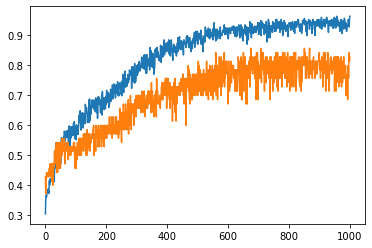

In [78]:
import tensorflow as tf
import tensorflow.keras as keras

from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(X.shape[1], input_dim=X.shape[1], activation="tanh"))
model.add(Dense(150, activation="relu"))
model.add(Dense(5, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

history = model.fit(X, y, epochs=1000, validation_split = 0.2)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [90]:
np.set_printoptions(precision=2, suppress=True)

test_seq_number = 10

ttf_labels = ['<10s', '10-30s', '30-60s', '>60s', '>90s']

y_pred = model.predict(X_test)
prediction = y_pred[test_seq_number]
expected = y_test[test_seq_number]

print("Expected:", ttf_labels[np.argmax(expected)], " ", expected)
print("Predicted:", ttf_labels[np.argmax(prediction)], " ", prediction)


Expected: 10-30s   [0. 1. 0. 0. 0.]
Predicted: 10-30s   [0.02 0.52 0.4  0.06 0.  ]


In [99]:
from sklearn.metrics import confusion_matrix



y_true_label = []
y_pred_label = []

for i in range(len(y_test)):
    y_true_label.append(ttf_labels[np.argmax(y_test[i])])
    y_pred_label.append(ttf_labels[np.argmax(y_pred[i])])


confusion_matrix(y_true_label, y_pred_label, labels=ttf_labels)

array([[13,  2,  1,  0,  0],
       [ 4, 35,  2,  0,  0],
       [ 3,  8, 40,  3,  1],
       [ 0,  0,  3, 28,  1],
       [ 2,  0,  3,  4, 19]], dtype=int64)

In [ ]:
# looking at confustion matrix we can see that majority of the predictions is located on diagonal
# which means that model is trained well